In [28]:
#Importing all packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [29]:
#Package for the parquet file
import pyarrow.parquet as pq

In [30]:
df_cmm = pq.read_table(r'C:\Users\k2sin\Erdos_Inst_Bootcamp-2020\Code2020Materials\cmm_erdos_bootcamp_2020_timeseries.pq').to_pandas()

In [31]:
df_cmm.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
0,2017-01-01,2017,1,1,1,0,0,1,974,701,574
1,2017-01-02,2017,1,2,2,1,0,0,5073,2976,3149
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792


In [32]:
#Convering date_val to datetime format

df_cmm_mod = df_cmm
df_cmm_mod['date_val'] = pd.to_datetime(df_cmm_mod['date_val'])

In [33]:
# Function for calculating mean percent error

def mpe(true,pred):
    s = 0
    for i in range(len(true)):
        s += abs(true[i] - pred[i])/true[i]
    return s*100/len(true)

# Forecast for the entire year 2019

In [34]:
train_test_sep = datetime(2019,1,1)
df_cmm_mod_train = df_cmm_mod.loc[df_cmm_mod.date_val < train_test_sep]
df_cmm_mod_test = df_cmm_mod.loc[df_cmm_mod.date_val >= train_test_sep]

trainA, trainB, trainC = df_cmm_mod_train['volume_A'].values,df_cmm_mod_train['volume_B'].values,\
df_cmm_mod_train['volume_C'].values
    
testA, testB, testC = df_cmm_mod_test['volume_A'].values,df_cmm_mod_test['volume_B'].values,\
df_cmm_mod_test['volume_C'].values

In [35]:
#ARIMA(7,0,7)

from statsmodels.tsa.api import ARIMA

arima = ARIMA(trainA, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_A = arima_fit.forecast(len(testA))[0]
print('Mean Percent error for Volume_A with ARIMA method is', mpe(testA,pred_ar_A))

arima = ARIMA(trainB, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_B = arima_fit.forecast(len(testB))[0]
print('Mean Percent error for Volume_B with ARIMA method is', mpe(testB,pred_ar_B))

arima = ARIMA(trainC, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_C = arima_fit.forecast(len(testC))[0]
print('Mean Percent error for Volume_C with ARIMA method is', mpe(testC,pred_ar_C))

C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Mean Percent error for Volume_A with ARIMA method is 10.860081036423365


C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mean Percent error for Volume_B with ARIMA method is 11.885452047853654
Mean Percent error for Volume_C with ARIMA method is 14.30698752300373


C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


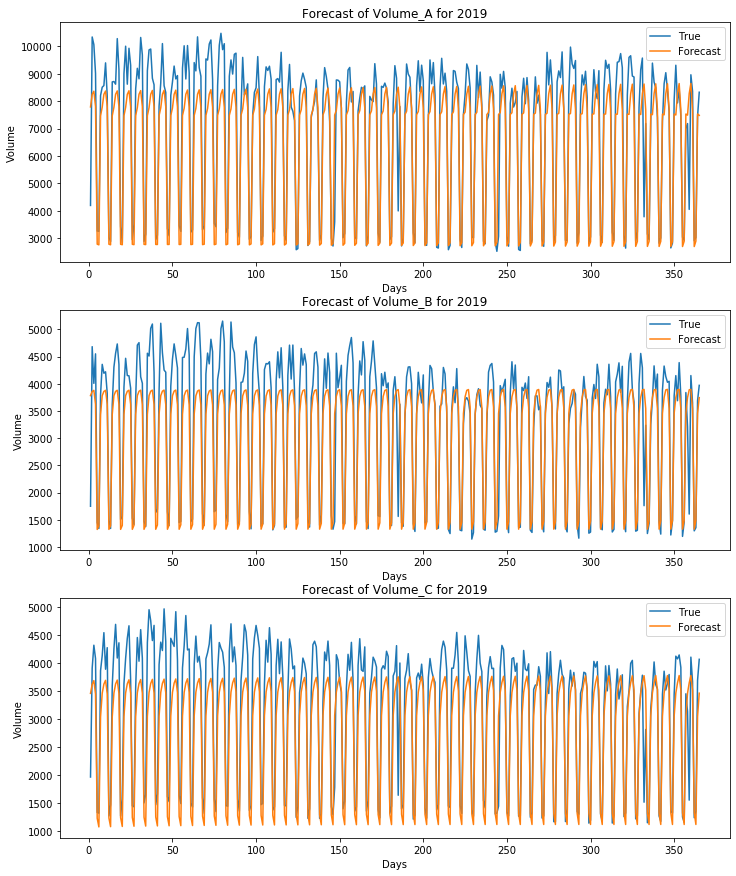

In [36]:
#Plots for ARIMA with parameters (7,0,7)

fig, ax = plt.subplots(3,1,figsize = (12,15))

ax[0].plot(range(1,366), testA,label = 'True')
ax[0].plot(range(1,366),pred_ar_A,label = 'Forecast')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Volume')
ax[0].set_title('Forecast of Volume_A for 2019')
ax[0].legend()

ax[1].plot(range(1,366), testB,label = 'True')
ax[1].plot(range(1,366),pred_ar_B,label = 'Forecast')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Volume')
ax[1].set_title('Forecast of Volume_B for 2019')
ax[1].legend()

ax[2].plot(range(1,366), testC,label = 'True')
ax[2].plot(range(1,366),pred_ar_C,label = 'Forecast')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Volume')
ax[2].set_title('Forecast of Volume_C for 2019')
ax[2].legend()

# Forecast for the last 6 months of 2019

In [37]:
train_test_sep = datetime(2019,7,1)
df_cmm_mod_train = df_cmm_mod.loc[df_cmm_mod.date_val < train_test_sep]
df_cmm_mod_test = df_cmm_mod.loc[df_cmm_mod.date_val >= train_test_sep]

trainA, trainB, trainC = df_cmm_mod_train['volume_A'].values,df_cmm_mod_train['volume_B'].values,\
df_cmm_mod_train['volume_C'].values
    
testA, testB, testC = df_cmm_mod_test['volume_A'].values,df_cmm_mod_test['volume_B'].values,\
df_cmm_mod_test['volume_C'].values

In [38]:
#ARIMA(7,0,7)

from statsmodels.tsa.api import ARIMA

arima = ARIMA(trainA, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_A = arima_fit.forecast(len(testA))[0]
print('Mean Percent error for Volume_A with ARIMA method is', mpe(testA,pred_ar_A))

arima = ARIMA(trainB, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_B = arima_fit.forecast(len(testB))[0]
print('Mean Percent error for Volume_B with ARIMA method is', mpe(testB,pred_ar_B))

arima = ARIMA(trainC, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_C = arima_fit.forecast(len(testC))[0]
print('Mean Percent error for Volume_C with ARIMA method is', mpe(testC,pred_ar_C))

C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Mean Percent error for Volume_A with ARIMA method is 8.494284868480097


C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mean Percent error for Volume_B with ARIMA method is 9.984061805625432
Mean Percent error for Volume_C with ARIMA method is 9.022907251457372


C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


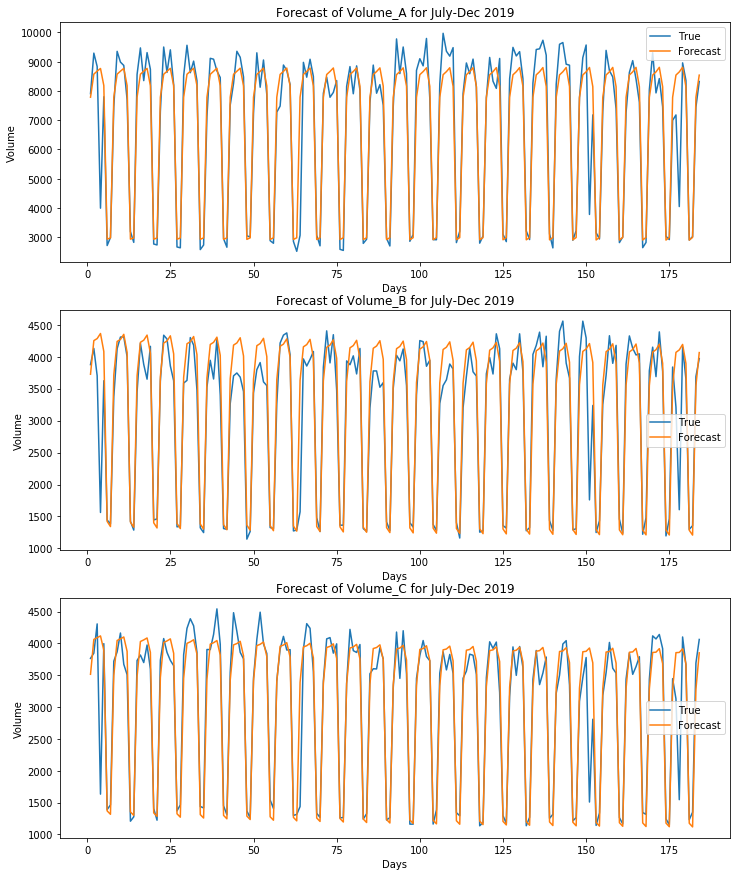

In [39]:
#Plots for ARIMA using parameters (7,0,7)

fig, ax = plt.subplots(3,1,figsize = (12,15))

ax[0].plot(range(1,185), testA,label = 'True')
ax[0].plot(range(1,185),pred_ar_A,label = 'Forecast')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Volume')
ax[0].set_title('Forecast of Volume_A for July-Dec 2019')
ax[0].legend()

ax[1].plot(range(1,185), testB,label = 'True')
ax[1].plot(range(1,185),pred_ar_B,label = 'Forecast')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Volume')
ax[1].set_title('Forecast of Volume_B for July-Dec 2019')
ax[1].legend()

ax[2].plot(range(1,185), testC,label = 'True')
ax[2].plot(range(1,185),pred_ar_C,label = 'Forecast')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Volume')
ax[2].set_title('Forecast of Volume_C for July-Dec 2019')
ax[2].legend()

# Forecast for the last 3 months of 2019

In [40]:
train_test_sep = datetime(2019,10,1)
df_cmm_mod_train = df_cmm_mod.loc[df_cmm_mod.date_val < train_test_sep]
df_cmm_mod_test = df_cmm_mod.loc[df_cmm_mod.date_val >= train_test_sep]

trainA, trainB, trainC = df_cmm_mod_train['volume_A'].values,df_cmm_mod_train['volume_B'].values,\
df_cmm_mod_train['volume_C'].values
    
testA, testB, testC = df_cmm_mod_test['volume_A'].values,df_cmm_mod_test['volume_B'].values,\
df_cmm_mod_test['volume_C'].values

In [41]:
#ARIMA(7,0,7)

from statsmodels.tsa.api import ARIMA

arima = ARIMA(trainA, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_A = arima_fit.forecast(len(testA))[0]
print('Mean Percent error for Volume_A with ARIMA method is', mpe(testA,pred_ar_A))

arima = ARIMA(trainB, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_B = arima_fit.forecast(len(testB))[0]
print('Mean Percent error for Volume_B with ARIMA method is', mpe(testB,pred_ar_B))

arima = ARIMA(trainC, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_C = arima_fit.forecast(len(testC))[0]
print('Mean Percent error for Volume_C with ARIMA method is', mpe(testC,pred_ar_C))

C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mean Percent error for Volume_A with ARIMA method is 11.168533925516119
Mean Percent error for Volume_B with ARIMA method is 9.233225815021457
Mean Percent error for Volume_C with ARIMA method is 9.350281057953552


C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


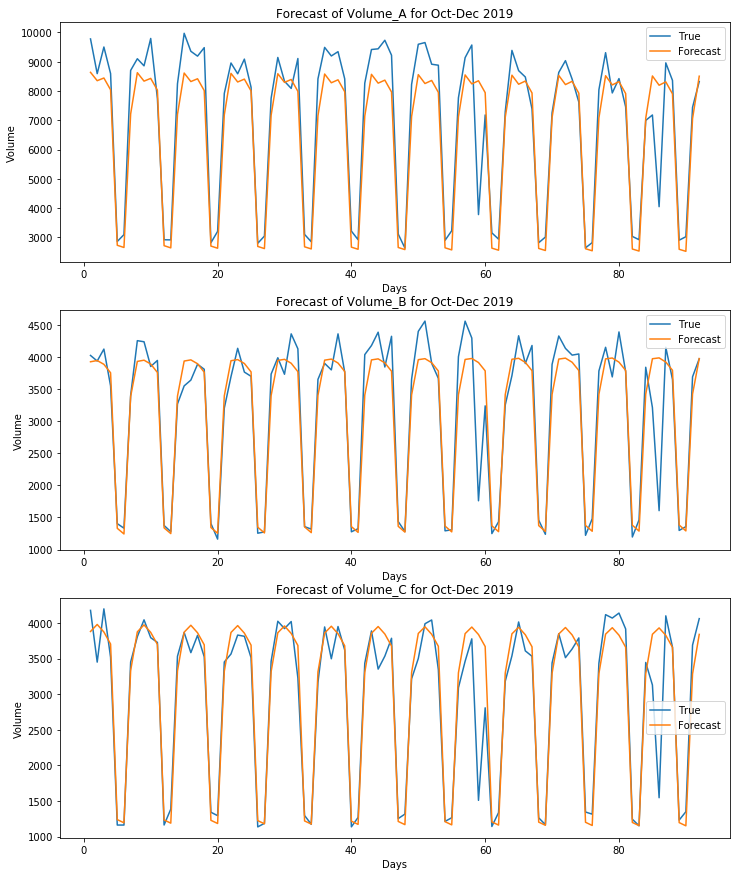

In [42]:
#Plots for ARIMA using parameters (7,0,7)

fig, ax = plt.subplots(3,1,figsize = (12,15))

ax[0].plot(range(1,93), testA,label = 'True')
ax[0].plot(range(1,93),pred_ar_A,label = 'Forecast')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Volume')
ax[0].set_title('Forecast of Volume_A for Oct-Dec 2019')
ax[0].legend()

ax[1].plot(range(1,93), testB,label = 'True')
ax[1].plot(range(1,93),pred_ar_B,label = 'Forecast')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Volume')
ax[1].set_title('Forecast of Volume_B for Oct-Dec 2019')
ax[1].legend()

ax[2].plot(range(1,93), testC,label = 'True')
ax[2].plot(range(1,93),pred_ar_C,label = 'Forecast')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Volume')
ax[2].set_title('Forecast of Volume_C for Oct-Dec 2019')
ax[2].legend()

# Forecast for December 2019

In [43]:
train_test_sep = datetime(2019,12,1)
df_cmm_mod_train = df_cmm_mod.loc[df_cmm_mod.date_val < train_test_sep]
df_cmm_mod_test = df_cmm_mod.loc[df_cmm_mod.date_val >= train_test_sep]

trainA, trainB, trainC = df_cmm_mod_train['volume_A'].values,df_cmm_mod_train['volume_B'].values,\
df_cmm_mod_train['volume_C'].values
    
testA, testB, testC = df_cmm_mod_test['volume_A'].values,df_cmm_mod_test['volume_B'].values,\
df_cmm_mod_test['volume_C'].values

In [44]:
#ARIMA(7,0,7)

from statsmodels.tsa.api import ARIMA

arima = ARIMA(trainA, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_A = arima_fit.forecast(len(testA))[0]
print('Mean Percent error for Volume_A with ARIMA method is', mpe(testA,pred_ar_A))

arima = ARIMA(trainB, order = (7,0,7))
arima_fit = arima.fit()
pred_ar_B = arima_fit.forecast(len(testB))[0]
print('Mean Percent error for Volume_B with ARIMA method is', mpe(testB,pred_ar_B))

arima = ARIMA(trainC, order = (7,0,5))
arima_fit = arima.fit()
pred_ar_C = arima_fit.forecast(len(testC))[0]
print('Mean Percent error for Volume_C with ARIMA method is', mpe(testC,pred_ar_C))

C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Mean Percent error for Volume_A with ARIMA method is 9.550233738311551


C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mean Percent error for Volume_B with ARIMA method is 13.222851866273237
Mean Percent error for Volume_C with ARIMA method is 14.190389038695974


C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


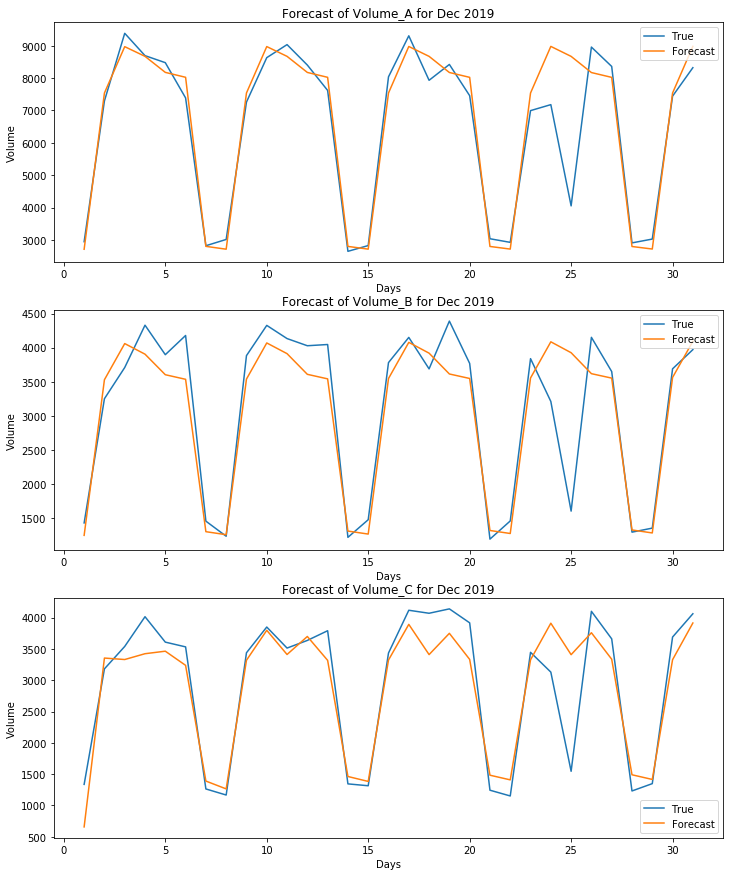

In [45]:
#Plots for Seasonal naive method with seasonality of 7 days

fig, ax = plt.subplots(3,1,figsize = (12,15))

ax[0].plot(range(1,32), testA,label = 'True')
ax[0].plot(range(1,32),pred_ar_A,label = 'Forecast')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Volume')
ax[0].set_title('Forecast of Volume_A for Dec 2019')
ax[0].legend()

ax[1].plot(range(1,32), testB,label = 'True')
ax[1].plot(range(1,32),pred_ar_B,label = 'Forecast')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Volume')
ax[1].set_title('Forecast of Volume_B for Dec 2019')
ax[1].legend()

ax[2].plot(range(1,32), testC,label = 'True')
ax[2].plot(range(1,32),pred_ar_C,label = 'Forecast')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Volume')
ax[2].set_title('Forecast of Volume_C for Dec 2019')
ax[2].legend()

In [47]:
arima = ARIMA(trainB, order = (7,0,7))
arima_fit = arima.fit(maxiter=200)
pred_ar_B = arima_fit.forecast(len(testB))[0]
print('Mean Percent error for Volume_B with ARIMA method is', mpe(testB,pred_ar_B))


Mean Percent error for Volume_B with ARIMA method is 13.158138325547617


C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\k2sin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
